In order to understand this tutorial you should have understanding of regression splines. You can get information in:

1) Introduction to statistical learning, Chapter 7

2) https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

## In this tutorial we'll cover the use of Polynomial regression, step functions, b-splines and natural splines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn-white')

# We'll begin with a simple linear model and then try polynomial features

In [2]:
data = pd.read_csv('Wage.csv')

In [87]:
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


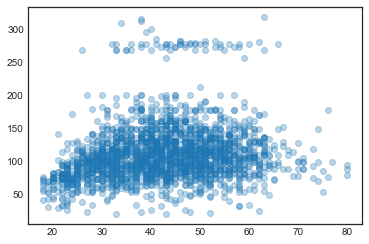

In [4]:
x = data['age']
y = data['wage']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_tr, X_val, y_tr, y_val = train_test_split(x, y, test_size=0.3, random_state = 42)
plt.scatter(X_tr,y_tr, alpha=0.3)

In [117]:
X = sm.add_constant(X_tr)
lm1 = sm.OLS(y_tr, X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     75.45
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.40e-18
Time:                        11:57:35   Log-Likelihood:                -10805.
No. Observations:                2100   AIC:                         2.161e+04
Df Residuals:                    2098   BIC:                         2.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6780      3.464     23.868      0.0

In [124]:
lm1_preds = lm1.predict(sm.add_constant(X_val))
np.sqrt(mean_squared_error(y_val, lm1_preds))

39.47996261853883

In [176]:
# We will use 70 points between minimum and maximum values of valid_x for plotting
x_simulated = np.linspace(X_val.min(),X_val.max(),70).reshape(-1,1)
preds_for_plot = lm1.predict(sm.add_constant(x_simulated))

So what we can conclude from ordinary least squares regression is that it couldn't capture all relationships between target and predictor. RMSE is also pretty high.

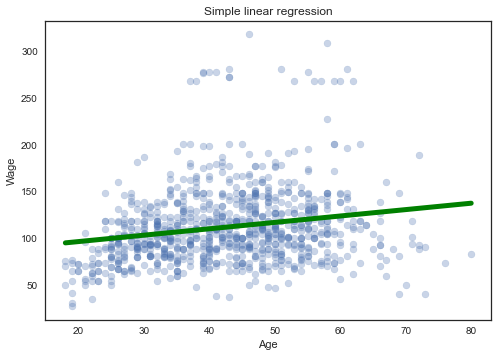

In [365]:
plt.scatter(X_val, y_val, alpha=0.3)
plt.plot(x_simulated, preds_for_plot, 'green', linewidth=5)
plt.title('Simple linear regression')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

In [147]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

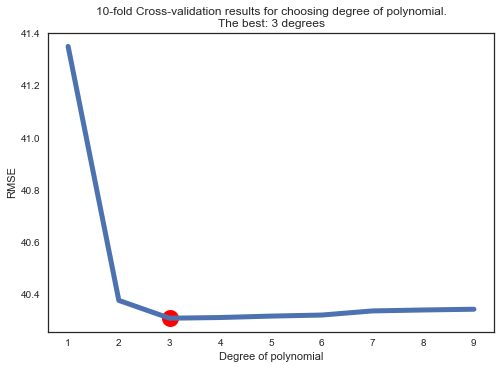

In [195]:
train_scores = []
for i in range(1,10):
    x_transformed = PolynomialFeatures(degree=i).fit_transform(np.array(X_tr).reshape(-1,1))
    model = LinearRegression()
    score = -np.mean(cross_val_score(model, x_transformed, y_tr, cv=10, scoring='neg_root_mean_squared_error'))
    train_scores.append(score)
    
best_score = np.argmin(train_scores)+1
plt.plot(range(1,10), train_scores, linewidth=5)
plt.scatter(best_score, train_scores[best_score], c='red', linewidths=10)
plt.ylabel('RMSE')
plt.xlabel('Degree of polynomial')
plt.title('10-fold Cross-validation results for choosing degree of polynomial.\nThe best: %s degrees' % best_score)
plt.show()

In [326]:
transformer = PolynomialFeatures(3)
x_transformed = transformer.fit_transform(np.array(X_tr).reshape(-1,1))
lm2 = sm.OLS(y_tr, sm.add_constant(x_transformed)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     62.29
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           1.42e-38
Time:                        08:45:00   Log-Likelihood:                -10752.
No. Observations:                2100   AIC:                         2.151e+04
Df Residuals:                    2096   BIC:                         2.153e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.7963     26.720     -3.211      0.0

In [362]:
X_val_poly3 = transformer.transform(X_val)
preds_poly3 = lm2.predict(X_val_poly3)
# RMSE is 38.52
np.sqrt(mean_squared_error(y_val, preds_poly3))

38.52301228377615

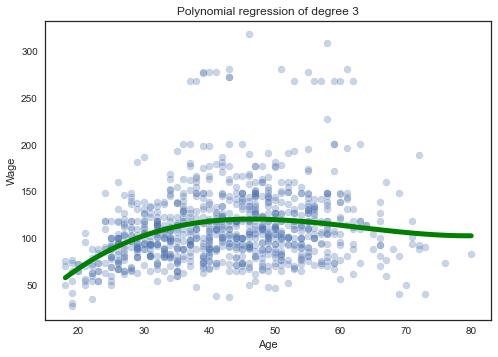

In [366]:
preds_for_plot2 = lm2.predict(sm.add_constant(transformer.transform(x_simulated)))
plt.scatter(X_val, y_val, alpha=0.3)
plt.plot(x_simulated, preds_for_plot2, 'green', linewidth=5)
plt.title('Polynomial regression of degree 3')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()
# now our fitted line is more "squiggly"
# but polynomial regression has many cons (overfitting, memory and etc.) 

In [278]:
infl = lm2.get_influence() # let's explore outliers
resids = infl.resid_studentized

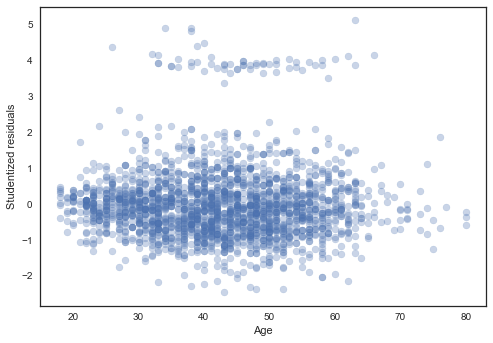

In [371]:
plt.scatter(X_tr, resids, alpha=0.3) # we may see outliers above 3
plt.ylabel('Studentized residuals')
plt.xlabel('Age')
plt.show()

In [288]:
resids = pd.Series(resids)
outliers = resids[resids > 3].index

In [306]:
# we must do this, as our train data comes from random split, so indices don't match
X_tr_without_outliers, y_tr_without_outliers = X_tr.copy(), y_tr.copy() 

In [307]:
X_tr_without_outliers.index, y_tr_without_outliers.index = range(2100), range(2100)

In [308]:
X_tr_without_outliers.drop(index=X_tr_without_outliers[outliers].index, inplace=True)
y_tr_without_outliers.drop(index=y_tr_without_outliers[outliers].index, inplace=True)

In [323]:
# again buila the same model as previous
transformer_outliers = PolynomialFeatures(3)
x_trnsf_outliers = transformer_outliers.fit_transform(np.array(X_tr_without_outliers).reshape(-1,1))
lm_outliers = sm.OLS(y_tr_without_outliers, sm.add_constant(x_trnsf_outliers)).fit()
print(lm_outliers.summary()) 
# you can see, that some statistics (R-squared, SE, F-stat) have changed and that's much better

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     80.74
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.36e-49
Time:                        08:44:15   Log-Likelihood:                -9846.3
No. Observations:                2041   AIC:                         1.970e+04
Df Residuals:                    2037   BIC:                         1.972e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.4977     19.991     -3.577      0.0

## You can try different techniques to improve your model, but we'll stop here and show you how polynomials can be dangerous sometimes and how to improve it with splines.

In [199]:
# just for an example let's build higher order polynomial
# and compare or results with the previous two models
transformer15 = PolynomialFeatures(15)
x_transformed = transformer15.fit_transform(np.array(X_tr).reshape(-1,1))
lm3 = sm.OLS(y_tr, sm.add_constant(x_transformed)).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                      -0.707
Model:                            OLS   Adj. R-squared:                 -0.712
Method:                 Least Squares   F-statistic:                    -173.5
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               1.00
Time:                        13:28:36   Log-Likelihood:                -11403.
No. Observations:                2100   AIC:                         2.282e+04
Df Residuals:                    2094   BIC:                         2.285e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.529e-26   4.29e-28     35.671      0.0

In [204]:
print(sm.stats.anova_lm(lm1, lm2, lm3)) 
# ANOVA tells us (according to p-value) that lm2 is better than lm1 and lm3

   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0    2098.0  3.619614e+06      0.0           NaN         NaN           NaN
1    2096.0  3.442835e+06      2.0  1.767789e+05   28.908422  4.123537e-13
2    2094.0  6.402545e+06      2.0 -2.959710e+06 -483.997620  1.000000e+00


D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


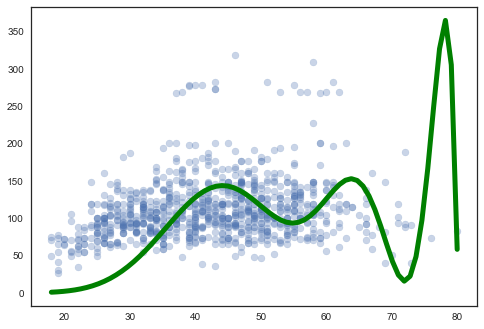

In [207]:
preds_for_plot3 = lm3.predict(sm.add_constant(transformer15.transform(x_simulated)))
plt.scatter(X_val, y_val, alpha=0.3)
plt.plot(x_simulated, preds_for_plot3, 'green', linewidth=5)
# now you see how bad 15-degree polynomial

# Fitting step function

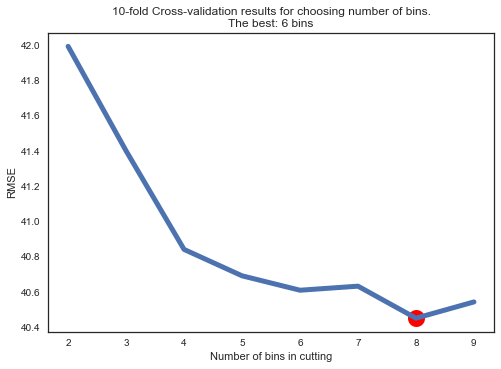

In [377]:
scores_cut = []
for i in range(2,10):
    X_cut, bins = pd.cut(X_tr,i, retbins=True)
    X_dummies = pd.get_dummies(X_cut)
    model = LinearRegression()
    score = -np.mean(cross_val_score(model, X_dummies, y_tr, cv=10, scoring='neg_root_mean_squared_error'))
    scores_cut.append(score)
best_score = np.argmin(scores_cut)
plt.plot(range(2,10), scores_cut, linewidth=5)
plt.scatter(best_score+2, scores_cut[best_score], c='red', linewidths=10)
plt.ylabel('RMSE')
plt.xlabel('Number of bins in cutting')
plt.title('10-fold Cross-validation results for choosing number of bins.\nThe best: %s bins' % best_score)
plt.show() # so we'll use 8 bins

In [378]:
X_tr_cut, bins = pd.cut(X_tr, bins=8, retbins=True)

In [379]:
X_tr_cut.value_counts()

(41.25, 49.0]      508
(33.5, 41.25]      475
(25.75, 33.5]      357
(49.0, 56.75]      349
(56.75, 64.5]      199
(17.938, 25.75]    168
(64.5, 72.25]       30
(72.25, 80.0]       14
Name: age, dtype: int64

In [380]:
df_steps = pd.concat([X_tr, X_tr_cut, y_tr], keys=['age','age_bins','wage'], axis=1)
# now we'll create dummy variables
df_steps_dummies = pd.get_dummies(X_tr_cut)
# df_steps_dummies.head()

In [381]:
# also prepare validation set, there's a nice func in numpy.digitize, read documentation, if you don't know it
bins_map = np.digitize(X_val, bins).reshape(-1)
X_val_cut = pd.get_dummies(bins_map).drop([9], axis=1) # we drop column '9' as it has only zeros

In [382]:
glm1 = sm.GLM(df_steps.wage, df_steps_dummies).fit()
preds_glm1 = glm1.predict(X_val_cut)
# RMSE is 38.58 (in polynomial regression was 38.52, in ordinary regression 39.)
# so result is pretty good in comparison with previous models
np.sqrt(mean_squared_error(y_val, preds_glm1))

38.580123249213536

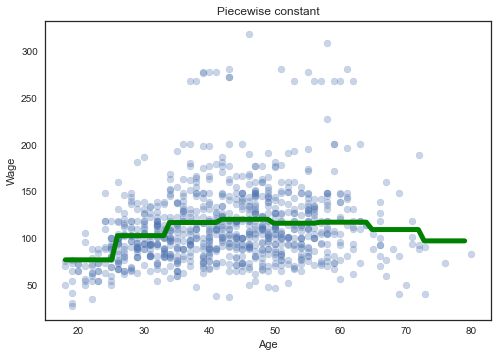

In [383]:
# again simulate data and plot fitted line
x_simulated_cut = np.linspace(X_val.min(),X_val.max()-1,70) 
bins_map = np.digitize(x_simulated_cut, bins) 
X_val_cut_2 = pd.get_dummies(bins_map) 
preds_for_plot4 = glm1.predict(X_val_cut_2)
plt.scatter(X_val, y_val, alpha=0.3)
plt.plot(x_simulated_cut, preds_for_plot4, 'green', linewidth=5)
plt.title('Piecewise constant')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()
# the main disadvantage of step function is that it's less flexible and interpretable  
# and doesn't show any trend for instance

# Using B-spline of degree 3

In [401]:
from patsy import dmatrix
# let's generate cubic splines with different knots
df_bs1 = dmatrix("bs(x, knots=(25,40,60), degree=3, include_intercept=True)", 
                        {'x': X_tr}, return_type='dataframe')
df_bs2 = dmatrix("bs(x, knots=(25,40,50,65), degree=3, include_intercept=True)", 
                        {'x': X_tr}, return_type='dataframe')
# for this we'll use bins from last model
df_bs3 = dmatrix("bs(x, knots=(25,33,41,49,56,64,72,80), degree=3, include_intercept=True)", 
                        {'x': X_tr}, return_type='dataframe')

In [402]:
glm2_bs1 = sm.GLM(y_tr, df_bs1).fit()
glm2_bs2 = sm.GLM(y_tr, df_bs2).fit()
glm2_bs3 = sm.GLM(y_tr, df_bs3).fit()

preds_glm2_bs1 = glm2_bs1.predict(
    dmatrix("bs(x, knots=(25,40,60), include_intercept=True)", {'x': X_val}, return_type='dataframe'))
preds_glm2_bs2 = glm2_bs2.predict(
    dmatrix("bs(x, knots=(25,40,50,65), include_intercept=True)", {'x': X_val}, return_type='dataframe'))
preds_glm2_bs3 = glm2_bs3.predict(
    dmatrix("bs(x, knots=(25,33,41,49,56,64,72,80), include_intercept=True)", {'x': X_val}, return_type='dataframe'))

In [394]:
np.sqrt(mean_squared_error(y_val, preds_glm2_bs1))

38.49600394356422

In [395]:
np.sqrt(mean_squared_error(y_val, preds_glm2_bs2))

38.41135681483282

In [403]:
np.sqrt(mean_squared_error(y_val, preds_glm2_bs3)) 
# these are best results from cutting age into 8 bins and actually using b-spline decreased error
# but with more knots we only increase model's complexity, 
# so in terms of bias-var trade-off we can use 4 knots, because difference isn't significant 

38.409878226743544

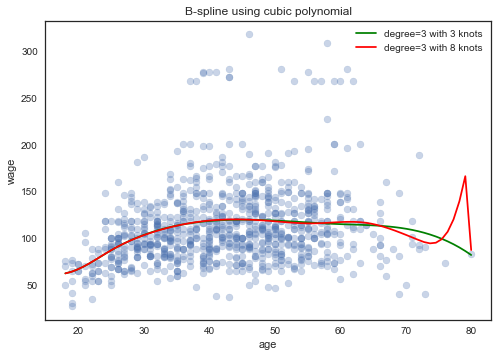

In [409]:
# and again plot results with simulated data, we'll use first and third models
preds_for_plot5 = glm2_bs1.predict(dmatrix("bs(x_sim, knots=(25,40,60), degree=3, include_intercept=True)",
                                           {'x_sim': x_simulated}, return_type='dataframe'))
preds_for_plot6 = glm2_bs3.predict(dmatrix("bs(x_sim, knots=(25,33,41,49,56,64,72,80), degree=3, include_intercept=True)", 
                                           {'x_sim': x_simulated}, return_type='dataframe'))

plt.scatter(X_val, y_val, alpha=0.3)
plt.plot(x_simulated, preds_for_plot5, 'green', label='degree=3 with 3 knots')
plt.plot(x_simulated, preds_for_plot6, 'red', label='degree=3 with 8 knots')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')
plt.title('B-spline using cubic polynomial')
plt.show()
# so B-spline with more knots tends to be erratic near the boundaries!

# Natural splines we'll handle this problem

In [413]:
# natural cubic spline adds additional constraints, so degrees of freedom equal to K number of knots
df_ns1 = dmatrix("cr(x, df=4)", {'x': X_tr}, return_type='dataframe')
df_ns2 = dmatrix("cr(x, df=8)", {'x': X_tr}, return_type='dataframe')

glm3_ns1 = sm.GLM(y_tr, df_ns1).fit()
glm3_ns2 = sm.GLM(y_tr, df_ns2).fit()

preds_glm3_ns1 = glm3_ns1.predict(
    dmatrix("cr(x, df=4)", {'x': X_val}, return_type='dataframe'))
preds_glm3_ns2 = glm3_ns2.predict(
    dmatrix("cr(x, df=8)", {'x': X_val}, return_type='dataframe'))

np.sqrt(mean_squared_error(y_val, preds_glm3_ns1)), np.sqrt(mean_squared_error(y_val, preds_glm3_ns2))
# here it's obvious that we should place 8 knots

(38.591441792249064, 38.40310538418576)

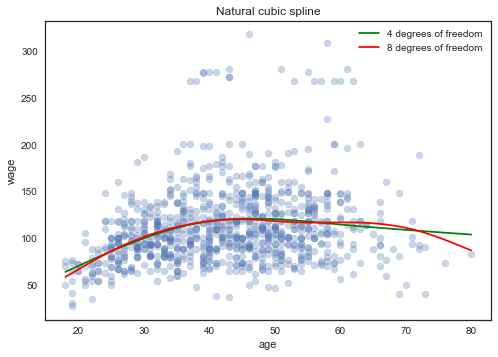

In [414]:
# results with simulated data
preds_for_plot7 = glm3_ns1.predict(dmatrix("cr(x_sim, df=4)", {'x_sim': x_simulated}, return_type='dataframe'))
preds_for_plot8 = glm3_ns2.predict(dmatrix("cr(x_sim, df=8)", {'x_sim': x_simulated}, return_type='dataframe'))

plt.scatter(X_val, y_val, alpha=0.3)
plt.plot(x_simulated, preds_for_plot7, 'green', label='4 degrees of freedom')
plt.plot(x_simulated, preds_for_plot8, 'red', label='8 degrees of freedom')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Natural cubic spline')
plt.show()
# our curves are no more erratic at the boundaries
# and ns with 8 df better shows relationship between wage and age for elderly
# but you can check, that this problem is also solved with 3 df

# To sum up what we've done so far:

1) we've build many models with only one feature 'age'

2) we've covered pros and cons of Polynomial regression (with this regression we've carried out ANOVA), Step functions, B-splines and Natural splines. All of them introduce non-linear opportunities for our model and thus make predictions more accurate. But:

Polynomial regression with high number of degree (>4) tends to be erratic at the boundaries.
Step functions are less interpretable and harder to capture trends, but in our case RMSE was pretty good.
Cubic B-spline is great to solve this problems, but also can be erratic at the boundaries.
At the end comes Natural cubic splines which put one more constraint and perform better.

3) we've used cross-validation to choose the number of knots and polynomial's degree

4) another way to choose where place knots: specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data

5) remmeber that for cubic B-splines df = 4 + K (where K - number of placed knots); for Natural splines df = K, so the more constaints we have, the less degrees of freedom are

6) another rule is place more knots where function can vary most

# Let's explore others variables

In [5]:
X = data.loc[:,['age', 'maritl', 'education', 'jobclass']]
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

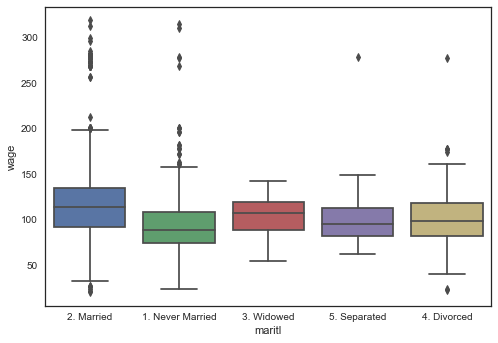

In [446]:
# you can choose another features
sn.boxplot(x=X_tr.maritl, y=y_tr) # so on average married couples tendo to earn more

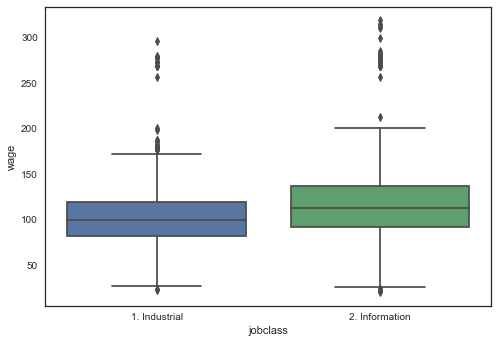

In [448]:
sn.boxplot(X_tr.jobclass, y_tr) # also people who work in industrial sphere earn less

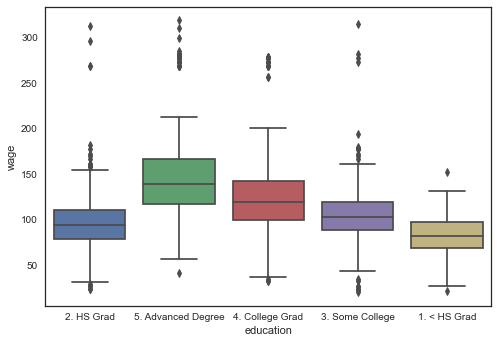

In [449]:
sn.boxplot(X_tr.education, y_tr) # and those who have advanced degree or at least college degree earn more

Unfortunately, I haven't found implementation in Python of Analysis of deviance as in R, so I conducted analys of these three models in R and results are next:

model0: gam(wage ~ s(age, 5) + education, data = Wage), <br> 
where s() - smoothing spline (which in comparison with ns and bs penalizes both loss function and a smoothing function), actually I've tried these models using natural spline, but there is approximately no difference; and gam is General additive model <br> 
model1: gam(wage ~ s(age, 5) + education + jobclass, data = Wage) <br>
model2: gam(wage ~ s(age, 5) + education + maritl, data = Wage) <br>
model3: gam(wage ~ s(age, 5) + education + jobclass + maritl, data = Wage)

In [457]:
pd.read_csv('Documents/anova_res.csv')
# from this table model2 is the best

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
0,2239.999818,2.822898e+06,NaN,NaN,NaN
1,2238.999818,2.814412e+06,1.0,8485.863247,8.602765e-03
2,2235.999818,2.755552e+06,3.0,58859.904911,2.253801e-10
3,2234.999818,2.747292e+06,1.0,8260.534648,9.532807e-03


And then I took some information from here: https://stackoverflow.com/questions/27328623/anova-test-for-glm-in-python <br> to implement ANOVA for General linear models. As you can see, in my implementation I used F-statistic rather than Chi-sq. As this work (http://www.bbk.ac.uk/ems/faculty/brooms/teaching/SMDA/SMDA-07.pdf) tells, if φ (true variance) for big model is known then we calculate Chi-sq stat, if not - F-stat. Results are approximately the same, also pay attention that in R I used **smoothing spline** and in this tutorial I used **b-spline**

In [93]:
make_anova_table(models) # models ypu can see below, I just place this table here for convenience

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>F)
0,2241,2.82821e+06,None,None,None
1,2240,2.81989e+06,1,8329.44,0.0101673
2,2237,2.75942e+06,3,60461.3,1.66972e-10
3,2236,2.75132e+06,1,8101.14,0.0103557


In [97]:
from scipy import stats

def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value, addtl_params)

def make_anova_table(models):
    resid_df = [models[0].df_resid]
    resid_deviance = [models[0].deviance]
    df = [None]
    deviance = [None]
    p_vals = [None]
    for i in range(1,len(models)):
        f_stat, p_val, addtl_params = calculate_nested_f_statistic(models[i-1], models[i])
        resid_df.append(models[i].df_resid)
        resid_deviance.append(models[i].deviance)
        df.append(addtl_params)
        deviance.append(models[i-1].deviance - models[i].deviance)
        p_vals.append(p_val)
    anova_table = np.array([resid_df, resid_deviance, df, deviance, p_vals])
    return pd.DataFrame(data=anova_table.T, columns=['Resid. Df', 'Resid. Dev', 'Df', 'Deviance', 'Pr(>F)'])

In [50]:
from statsmodels.gam.api import BSplines, GLMGam
bs = BSplines(X_tr.age, df=[5], degree=[3])
gam1 = GLMGam.from_formula('wage ~ education', data=X_tr.join(y_tr), smoother=bs).fit()
gam2 = GLMGam.from_formula('wage ~ education + jobclass', data=X_tr.join(y_tr), smoother=bs).fit()
gam3 = GLMGam.from_formula('wage ~ education + maritl', data=X_tr.join(y_tr), smoother=bs).fit()
gam4 = GLMGam.from_formula('wage ~ education + jobclass + maritl', data=X_tr.join(y_tr), smoother=bs).fit()
models = [gam1, gam2, gam3, gam4]

In [474]:
preds = pd.read_csv('Documents/preds.csv')
np.sqrt(mean_squared_error(y_val, preds.x))
# that's the best score we've achieved by far, 
# you can continue exploring data, I hope this tutorial is useful for you!

34.0345173464364